<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/07_pytorch_experiment_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/07_pytorch_experiment_tracking.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/07_pytorch_experiment_tracking.pdf) 

# 07. PyTorch Experiment Tracking

> **Note:** This notebook uses `torchvision`'s new [multi-weight support API (available in `torchvision` v0.13+)](https://pytorch.org/blog/introducing-torchvision-new-multi-weight-support-api/). 

在制作 FoodVision Mini（一种用于对比萨、牛排或寿司图像进行分类的图像分类模型）的过程中，我们已经训练了相当多的模型。

到目前为止，我们已经通过 Python 字典跟踪它们。

或者只是在训练期间通过度量打印输出来比较它们。

如果您想一次运行十几个（或更多）不同的模型怎么办？

肯定有更好的办法...

有。

**实验跟踪。**

由于实验跟踪对于机器学习非常重要且不可或缺，因此您可以将此笔记本视为您的第一个里程碑项目。

欢迎来到里程碑项目 1：FoodVision 迷你实验跟踪。

我们将回答这个问题：**如何跟踪我的机器学习实验？**

## What is experiment tracking?

机器学习和深度学习是非常实验性的。

您必须戴上艺术家的贝雷帽/厨师帽，才能制作出许多不同的模型。

你必须穿上科学家的外衣来跟踪数据、模型架构和训练制度的各种组合的结果。

这就是**实验跟踪**的用武之地。

如果您正在运行大量不同的实验，**实验跟踪可帮助您确定哪些有效，哪些无效**。

## Why track experiments?

如果您只运行少数模型（就像我们到目前为止所做的那样），那么只需在打印输出和一些字典中跟踪它们的结果就可以了。

但是，随着您运行的实验数量开始增加，这种幼稚的跟踪方式可能会失控。

因此，如果您遵循机器学习从业者的座右铭*experiment,experiment,experiment!*，您将需要一种跟踪它们的方法。
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-experiment-tracking-can-get-out-of-hand.png" alt="experiment tracking can get out of hand, many different experiments with different names" width=900/>

*在构建了一些模型并跟踪其结果后，您会开始注意到它会以多快的速度失控。*

## Different ways to track machine learning experiments 

跟踪机器学习实验的方法与要运行的实验一样多。

这张表涵盖了一些。

| **Method** | **Setup** | **Pros** | **Cons** | **Cost** |
| ----- | ----- | ----- | ----- | ----- |
| Python dictionaries, CSV files, print outs | None |简单使用，直接在原始的Python中使用 | 难以追踪大量的实验 | Free |
| [TensorBoard](https://www.tensorflow.org/tensorboard/get_started) | Minimal, 安装 [`tensorboard`](https://pypi.org/project/tensorboard/) | 对PyTorch的扩展,广泛认可和使用，易于扩展。 | 用户体验不如其他选项好。| Free |
| [Weights & Biases Experiment Tracking](https://wandb.ai/site/experiment-tracking) | Minimal, 安装 [`wandb`](https://docs.wandb.ai/quickstart), 注册 | 令人难以置信的用户体验，公开实验，跟踪几乎所有内容。| 需要 PyTorch 之外的外部资源。| Free for personal use | 
| [MLFlow](https://mlflow.org/) | Minimal, 安装 `mlflow` 并开始追踪 | 完全开源的 MLOps 生命周期管理，许多集成。 | 设置远程跟踪服务器比其他服务更难。 | Free | 

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-different-places-to-track-experiments.png" alt="various places to track machine learning experiments" width=900/>

*您可以使用各种地点和技术来跟踪您的机器学习实验。 **注意：** 还有其他各种类似于权重和偏差的选项以及类似于 MLflow 的开源选项，但为简洁起见，我将它们排除在外。 您可以通过搜索“机器学习实验跟踪”找到更多信息。*

## What we're going to cover

我们将使用不同级别的数据、模型大小和训练时间运行几个不同的建模实验，以尝试和改进 FoodVision Mini。

由于它与 PyTorch 的紧密集成和广泛使用，这个 notebook 专注于使用 `TensorBoard` 来跟踪我们的实验。

但是，我们将要介绍的原则在所有其他用于实验跟踪的工具中都是相似的。

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Getting setup** | We've written a fair bit of useful code over the past few sections, let's download it and make sure we can use it again. |
| **1. Get data** | Let's get the pizza, steak and sushi image classification dataset we've been using to try and improve our FoodVision Mini model's results. |
| **2. Create Datasets and DataLoaders** | We'll use the `data_setup.py` script we wrote in chapter 05. PyTorch Going Modular to setup our DataLoaders. |
| **3. Get and customise a pretrained model** | Just like the last section, 06. PyTorch Transfer Learning we'll download a pretrained model from `torchvision.models` and customise it to our own problem. | 
| **4. Train model amd track results** | Let's see what it's like to train and track the training results of a single model using TensorBoard. |
| **5. View our model's results in TensorBoard** | Previously we visualized our model's loss curves with a helper function, now let's see what they look like in TensorBoard. |
| **6. Creating a helper function to track experiments** | If we're going to be adhering to the machine learner practitioner's motto of *experiment, experiment, experiment!*, we best create a function that will help us save our modelling experiment results. |
| **7. Setting up a series of modelling experiments** | Instead of running experiments one by one, how about we write some code to run several experiments at once, with different models, different amounts of data and different training times. | 
| **8. View modelling experiments in TensorBoard** | By this stage we'll have run eight modelling experiments in one go, a fair bit to keep track of, let's what their results look like in TensorBoard. | 
| **9. Load in the best model and make predictions with it** | The point of experiment tracking is to figure out which model performs the best, let's load in the best performing model and make some predictions with it to *visualize, visualize, visualize!*. |

## Where can you get help?

All of the materials for this course [are available on GitHub](https://github.com/mrdbourke/pytorch-deep-learning).

If you run into trouble, you can ask a question on the course [GitHub Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions).

And of course, there's the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) and [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch. 

## 0. Getting setup 

让我们首先下载本节所需的所有模块。

为了节省我们编写额外代码的时间，我们将利用我们在 [05. PyTorch 走向模块化](https://www.learnpytorch.io/05_pytorch_going_modular/)。

具体来说，我们将从 `pytorch-deep-learning` 存储库下载 [`going_modular`](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular) 目录（如果 我们还没有）。

如果 [`torchinfo`](https://github.com/TylerYep/torchinfo) 包不可用，我们还将获得它。

`torchinfo` 将帮助我们稍后为我们的模型提供视觉摘要。

由于我们使用的是 `torchvision` 软件包的更新版本（截至 2022 年 6 月的 v0.13），我们将确保我们拥有最新版本。

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 1.12.1
torchvision version: 0.13.1


> **Note:** If you're using Google Colab, you may have to restart your runtime after running the above cell. After restarting, you can run the cell again and verify you've got the right versions of `torch` (0.12+) and `torchvision` (0.13+).

In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

Now let's setup device agnostic code.

> **Note:** If you're using Google Colab, and you don't have a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`.

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Create a helper function to set seeds

Since we've been setting random seeds a whole bunch throughout previous sections, how about we functionize it?

Let's create a function to "set the seeds" called `set_seeds()`.

> **Note:** Recall a [random seed](https://en.wikipedia.org/wiki/Random_seed) is a way of flavouring the randomness generated by a computer. They aren't necessary to always set when running machine learning code, however, they help ensure there's an element of reproducibility (the numbers I get with my code are similar to the numbers you get with your code). Outside of an education or experimental setting, random seeds generally aren't required.

In [4]:
# Set seeds
def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)

## 1. Get data

As always, before we can run machine learning experiments, we'll need a dataset.

We're going to continue trying to improve upon the results we've been getting on FoodVision Mini.

In the previous section, [06. PyTorch Transfer Learning](https://www.learnpytorch.io/06_pytorch_transfer_learning/), we saw how powerful using a pretrained model and transfer learning could be when classifying images of pizza, steak and sushi.

So how about we run some experiments and try to further improve our results?

To do so, we'll use similar code to the previous section to download the [`pizza_steak_sushi.zip`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip) (if the data doesn't already exist) except this time its been functionised.

This will allow us to use it again later. 

In [5]:
import os
import zipfile

from pathlib import Path

import requests

def download_data(source: str, 
                  destination: str,
                  remove_source: bool = True) -> Path:
    """Downloads a zipped dataset from source and unzips to destination.

    Args:
        source (str): A link to a zipped file containing data.
        destination (str): A target directory to unzip data to.
        remove_source (bool): Whether to remove the source after downloading and extracting.
    
    Returns:
        pathlib.Path to downloaded data.
    
    Example usage:
        download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                      destination="pizza_steak_sushi")
    """
    # Setup path to data folder
    data_path = Path("data/")
    image_path = data_path / destination

    # If the image folder doesn't exist, download it and prepare it... 
    if image_path.is_dir():
        print(f"[INFO] {image_path} directory exists, skipping download.")
    else:
        print(f"[INFO] Did not find {image_path} directory, creating one...")
        image_path.mkdir(parents=True, exist_ok=True)
        
        # Download pizza, steak, sushi data
        target_file = Path(source).name
        with open(data_path / target_file, "wb") as f:
            request = requests.get(source)
            print(f"[INFO] Downloading {target_file} from {source}...")
            f.write(request.content)

        # Unzip pizza, steak, sushi data
        with zipfile.ZipFile(data_path / target_file, "r") as zip_ref:
            print(f"[INFO] Unzipping {target_file} data...") 
            zip_ref.extractall(image_path)

        # Remove .zip file
        if remove_source:
            os.remove(data_path / target_file)
    
    return image_path

image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data\pizza_steak_sushi directory exists, skipping download.


WindowsPath('data/pizza_steak_sushi')

Excellent! Looks like we've got our pizza, steak and sushi images in standard image classification format ready to go.

## 2. Create Datasets and DataLoaders

现在我们有了一些数据，让我们把它变成 PyTorch DataLoaders。

我们可以使用我们在 [05. PyTorch 模块化第 2 部分](https://www.learnpytorch.io/05_pytorch_going_modular/#2-create-datasets-and-dataloaders-data_setuppy)。

由于我们将使用迁移学习和来自 [`torchvision.models`](https://pytorch.org/vision/stable/models.html) 的专门预训练模型，我们将创建一个转换来正确准备我们的图像.

要将我们的图像转换为张量，我们可以使用：
1. 使用 `torchvision.transforms` 手动创建变换。
2. 使用 `torchvision.models.MODEL_NAME.MODEL_WEIGHTS.DEFAULT.transforms()` 自动创建转换。
    * 其中 `MODEL_NAME` 是特定的 `torchvision.models` 架构，`MODEL_WEIGHTS` 是一组特定的预训练权重，而 `DEFAULT` 表示“最佳可用权重”。
    
我们在 [06. PyTorch 迁移学习第 2 部分](https://www.learnpytorch.io/06_pytorch_transfer_learning/#2-create-datasets-and-dataloaders)。

让我们首先看一个手动创建“torchvision.transforms”管道的示例（以这种方式创建转换管道可以提供最多的自定义，但如果转换与预训练模型不匹配，可能会导致性能下降）。

我们需要确定的主要手动转换是我们所有的图像都以 ImageNet 格式标准化（这是因为预训练的 `torchvision.models` 都是在 [ImageNet](https://www.image-net.org) 上预训练的。

我们可以这样做：

```python
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
```

### 2.1 Create DataLoaders using manually created transforms

In [6]:
# Setup directories
train_dir = image_path / "train"
test_dir = image_path / "test"

# Setup ImageNet normalization levels (turns all images into similar distribution as ImageNet)
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])           
print(f"Manually created transforms: {manual_transforms}")

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=32
)

train_dataloader, test_dataloader, class_names

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


(<torch.utils.data.dataloader.DataLoader at 0x2730e4ad7f0>,
 ['pizza', 'steak', 'sushi'])

### 2.2 Create DataLoaders using automatically created transforms

数据转换和数据加载器创建！

现在让我们看看相同的转换管道是什么样的，但这次是使用自动转换。

我们可以通过首先实例化一组我们想要使用的预训练权重（例如 `weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT`）并在其上调用 `transforms()` 方法来做到这一点。

In [7]:
# Setup dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

# Setup pretrained weights (plenty of these available in torchvision.models)
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT

# Get transforms from weights (these are the transforms that were used to obtain the weights)
automatic_transforms = weights.transforms() 
print(f"Automatically created transforms: {automatic_transforms}")

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=automatic_transforms, # use automatic created transforms
    batch_size=32
)

train_dataloader, test_dataloader, class_names

Automatically created transforms: ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


(<torch.utils.data.dataloader.DataLoader at 0x273770e9cd0>,
 ['pizza', 'steak', 'sushi'])

## 3. Getting a pretrained model, freezing the base layers and changing the classifier head

在我们运行和跟踪多个建模实验之前，让我们看看运行和跟踪单个实验是什么感觉。

既然我们的数据已经准备好了，接下来我们需要的是一个模型。

让我们下载`torchvision.models.efficientnet_b0()`模型的预训练权重，并准备好与我们自己的数据一起使用。

In [8]:
# Note: This is how a pretrained model would be created in torchvision > 0.13, it will be deprecated in future versions.
# model = torchvision.models.efficientnet_b0(pretrained=True).to(device) # OLD 

# Download the pretrained weights for EfficientNet_B0
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # NEW in torchvision 0.13, "DEFAULT" means "best weights available"

# Setup the model with the pretrained weights and send it to the target device
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

# View the output of the model
# model

精彩的！

现在我们有了一个预训练的模型，让我们变成一个特征提取器模型。

本质上，我们将冻结模型的基础层（我们将使用它们从输入图像中提取特征），我们将更改分类器头（输出层）以适应我们正在使用的类的数量 （我们有 3 类：比萨、牛排、寿司）。

> **Note:** The idea of creating a feature extractor model (what we're doing here) was covered in more depth in [06. PyTorch Transfer Learning section 3.2: Setting up a pretrained model](https://www.learnpytorch.io/06_pytorch_transfer_learning/#32-setting-up-a-pretrained-model).

In [9]:
# Freeze all base layers by setting requires_grad attribute to False
for param in model.features.parameters():
    param.requires_grad = False
    
# Since we're creating a new layer with random weights (torch.nn.Linear), 
# let's set the seeds
set_seeds() 

# Update the classifier head to suit our problem
model.classifier = torch.nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, 
              out_features=len(class_names),
              bias=True).to(device))

Base layers frozen, classifier head changed, let's get a summary of our model with `torchinfo.summary()`.

In [10]:
from torchinfo import summary

# # Get a summary of the model (uncomment for full output)
# summary(model, 
#         input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
#         verbose=0,
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"]
# )

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-output-of-torchinfo-summary.png" alt="output of torchinfo.summary() when passed our model when base layers are frozen and classifier head is updated" width=900/>

*使用我们的特征提取器 EffNetB0 模型输出`torchinfo.summary()`，注意基础层是如何被冻结的（不可训练的），输出层是如何根据我们自己的问题定制的。*

## 4. Train model and track results

模型准备出发！

让我们准备好通过创建损失函数和优化器来训练它。

由于我们正在处理多个类，我们将使用 [`torch.nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) 作为loss。

我们将坚持使用 [`torch.optim.Adam()`](https://pytorch.org/docs/stable/optim.html)，优化器的学习率为 `0.001`。

In [11]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Adjust `train()` function to track results with `SummaryWriter()`

Beautiful!

我们的所有训练代码都开始融合在一起。

现在让我们添加最后一块来跟踪我们的实验。

以前，我们使用多个 Python 字典（每个模型一个）来跟踪我们的建模实验。

但是你可以想象，如果我们只进行几个实验，这可能会失控。

不用担心，还有更好的选择！

我们可以使用 PyTorch 的 [`torch.utils.tensorboard.SummaryWriter()`](https://pytorch.org/docs/stable/tensorboard.html) 类将模型训练进度的各个部分保存到文件中。

默认情况下，`SummaryWriter()` 类将有关我们模型的各种信息保存到由 `log_dir` 参数设置的文件中。

`log_dir` 的默认位置在 `runs/CURRENT_DATETIME_HOSTNAME` 下，其中 `HOSTNAME` 是您计算机的名称。

但是，当然，您可以更改跟踪实验的位置（文件名可以根据需要进行自定义）。

`SummaryWriter()` 的输出以 [TensorBoard 格式](https://www.tensorflow.org/tensorboard/) 保存。

TensorBoard 是 TensorFlow 深度学习库的一部分，是可视化模型不同部分的绝佳方式。

为了开始跟踪我们的建模实验，让我们创建一个默认的`SummaryWriter()`实例。

In [12]:
from torch.utils.tensorboard import SummaryWriter

# Create a writer with all default settings
writer = SummaryWriter()

现在要使用 writer，我们可以编写一个新的训练循环，或者调整我们在 [05. PyTorch Going Modular 第 4 节](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them)。

让我们采取后一种选择。

我们将从 [`engine.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/engine.py) 获取 `train()` 函数并进行调整它使用`writer`。

具体来说，我们将为我们的`train()`函数添加记录模型的训练和测试损失和准确度值的能力。

我们可以使用 [`writer.add_scalars(main_tag, tag_scalar_dict)`](https://pytorch.org/docs/stable/tensorboard.html#torch.utils.tensorboard.writer.SummaryWriter.add_scalars) 来做到这一点，其中：
* `main_tag` (string) - 被跟踪的标量的名称（例如“Accuracy”）
* `tag_scalar_dict` (dict) - 被跟踪值的字典（例如`{"train_loss": 0.3454}`）
    * > **注意：** 该方法被称为 `add_scalars()` 因为我们的损失和准确率值通常是标量（单值）。

一旦我们完成跟踪值，我们将调用 `writer.close()` 来告诉 `writer` 停止寻找要跟踪的值。

要开始修改 `train()`，我们还将从 [`engine.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/engine.py) 导入 `train_step()` 和 `test_step()` 。

> **注意：** 您几乎可以在代码中的任何位置跟踪有关模型的信息。 但是经常会在模型训练时（在训练/测试循环内）跟踪实验。
>
> `torch.utils.tensorboard.SummaryWriter()` 类也有许多不同的方法来跟踪关于你的模型/数据的不同事物，例如 [`add_graph()`](https://pytorch.org/docs/stable/tensorboard.html#torch.utils.tensorboard.writer.SummaryWriter.add_graph)跟踪模型的计算图。 更多选项，[查看 `SummaryWriter()` 文档](https://pytorch.org/docs/stable/tensorboard.html#torch.utils.tensorboard.writer.SummaryWriter)。

In [14]:
from typing import Dict, List
from tqdm.auto import tqdm

from going_modular.going_modular.engine import train_step, test_step

# Import train() function from: 
# https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/engine.py
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
      model: A PyTorch model to be trained and tested.
      train_dataloader: A DataLoader instance for the model to be trained on.
      test_dataloader: A DataLoader instance for the model to be tested on.
      optimizer: A PyTorch optimizer to help minimize the loss function.
      loss_fn: A PyTorch loss function to calculate loss on both datasets.
      epochs: An integer indicating how many epochs to train for.
      device: A target device to compute on (e.g. "cuda" or "cpu").
      
    Returns:
      A dictionary of training and testing loss as well as training and
      testing accuracy metrics. Each metric has a value in a list for 
      each epoch.
      In the form: {train_loss: [...],
                train_acc: [...],
                test_loss: [...],
                test_acc: [...]} 
      For example if training for epochs=2: 
              {train_loss: [2.0616, 1.0537],
                train_acc: [0.3945, 0.3945],
                test_loss: [1.2641, 1.5706],
                test_acc: [0.3400, 0.2973]} 
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

        ### New: Experiment tracking ###
        # Add loss results to SummaryWriter
        writer.add_scalars(main_tag="Loss", 
                           tag_scalar_dict={"train_loss": train_loss,
                                            "test_loss": test_loss},
                           global_step=epoch)

        # Add accuracy results to SummaryWriter
        writer.add_scalars(main_tag="Accuracy", 
                           tag_scalar_dict={"train_acc": train_acc,
                                            "test_acc": test_acc}, 
                           global_step=epoch)
        
        # Track the PyTorch model architecture
        writer.add_graph(model=model, 
                         # Pass in an example input
                         input_to_model=torch.randn(32, 3, 224, 224).to(device))
    
    # Close the writer
    writer.close()
    
    ### End new ###

    # Return the filled results at the end of the epochs
    return results

呜呼！

我们的 `train()` 函数现在更新为使用 `SummaryWriter()` 实例来跟踪我们模型的结果。

我们尝试 5 个 epoch 怎么样？

In [15]:
# Train model
# Note: Not using engine.train() since the original script isn't updated to use writer
set_seeds()
results = train(model=model,
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                loss_fn=loss_fn,
                epochs=5,
                device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0948 | train_acc: 0.3984 | test_loss: 0.9034 | test_acc: 0.6411
Epoch: 2 | train_loss: 0.9005 | train_acc: 0.6445 | test_loss: 0.7874 | test_acc: 0.8561
Epoch: 3 | train_loss: 0.8115 | train_acc: 0.7500 | test_loss: 0.6749 | test_acc: 0.8759
Epoch: 4 | train_loss: 0.6853 | train_acc: 0.7383 | test_loss: 0.6704 | test_acc: 0.8352
Epoch: 5 | train_loss: 0.7091 | train_acc: 0.7383 | test_loss: 0.6768 | test_acc: 0.8040


> **注意：** 您可能会注意到这里的结果与我们的模型在 06.PyTorch 迁移学习中得到的结果略有不同。 不同之处在于使用 `engine.train()` 和我们修改的 `train()` 函数。 你能猜到为什么吗？ [关于随机性的 PyTorch 文档](https://pytorch.org/docs/stable/notes/randomness.html) 可能会有所帮助。

运行上面的单元格，我们得到与 [06. PyTorch 迁移学习第 4 部分：训练模型](https://www.learnpytorch.io/06_pytorch_transfer_learning/#4-train-model) 但不同之处在于我们的 `writer` 实例创建了一个 `runs/` 目录存储 我们模型的结果。

例如，保存位置可能如下所示：

```
runs/Jun21_00-46-03_daniels_macbook_pro
```

[默认格式](https://pytorch.org/docs/stable/tensorboard.html#torch.utils.tensorboard.writer.SummaryWriter)是`runs/CURRENT_DATETIME_HOSTNAME`。

我们将在一秒钟内检查这些，但作为提醒，我们之前在字典中跟踪我们模型的结果。

In [16]:
# Check out the model results
results

{'train_loss': [1.09475726634264,
  0.9005270600318909,
  0.8115105107426643,
  0.6853345558047295,
  0.7091127447783947],
 'train_acc': [0.3984375, 0.64453125, 0.75, 0.73828125, 0.73828125],
 'test_loss': [0.9034053285916647,
  0.7874306440353394,
  0.6748601198196411,
  0.6704476873079935,
  0.6768251856168112],
 'test_acc': [0.6410984848484849,
  0.8560606060606061,
  0.8759469696969697,
  0.8352272727272728,
  0.8039772727272728]}

嗯，我们可以把它格式化成一个很好的情节，但你能想象一下跟踪一堆这些字典吗？

一定有更好的方法...

## 5. View our model's results in TensorBoard

`SummaryWriter()` 类默认将模型的结果以 TensorBoard 格式存储在名为 `runs/` 的目录中。

TensorBoard 是由 TensorFlow 团队创建的可视化程序，用于查看和检查有关模型和数据的信息。

你知道这意味着什么？

是时候遵循数据可视化器的座右铭并*可视化、可视化、可视化！*

您可以通过多种方式查看 TensorBoard：

| Code environment | How to view TensorBoard | Resource |
| ----- | ----- | ----- |
| VS Code (notebooks or Python scripts) | Press `SHIFT + CMD + P` to open the Command Palette and search for the command "Python: Launch TensorBoard". | [VS Code Guide on TensorBoard and PyTorch](https://code.visualstudio.com/docs/datascience/pytorch-support#_tensorboard-integration) |
| Jupyter and Colab Notebooks | Make sure [TensorBoard is installed](https://pypi.org/project/tensorboard/), load it with `%load_ext tensorboard` and then view your results with `%tensorboard --logdir DIR_WITH_LOGS`. | [`torch.utils.tensorboard`](https://pytorch.org/docs/stable/tensorboard.html) and [Get started with TensorBoard](https://www.tensorflow.org/tensorboard/get_started) |

您还可以将您的实验上传到 [tensorboard.dev](https://tensorboard.dev/) 与他人公开分享。

在 Google Colab 或 Jupyter Notebook 中运行以下代码将启动交互式 TensorBoard 会话以查看 `runs/` 目录中的 TensorBoard 文件.

```python
%load_ext tensorboard # line magic to load TensorBoard
%tensorboard --logdir runs # run TensorBoard session with the "runs/" directory
```

In [17]:
# Example code to run in Jupyter or Google Colab Notebook (uncomment to try it out)
%load_ext tensorboard
%tensorboard --logdir runs

如果一切正常，您应该会看到如下内容：
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-tensorboard-single-experiment.png" alt="output of viewing a single experiment in tensorboard" width=900/>

*在 TensorBoard 中查看单个建模实验的准确度和损失结果。*

> **注意：**有关在笔记本或其他位置运行 TensorBoard 的更多信息，请参阅以下内容：
> * [TensorFlow 在笔记本中使用 TensorBoard 指南](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)
> * [开始使用 TensorBoard.dev](https://tensorboard.dev/#get-started)（有助于将 TensorBoard 日志上传到可共享链接）

## 6. Create a helper function to build `SummaryWriter()` instances

`SummaryWriter()` 类将各种信息记录到由 `log_dir` 参数指定的目录中。

我们如何创建一个辅助函数来为每个实验创建一个自定义目录？

本质上，每个实验都有自己的日志目录。

例如，假设我们要跟踪以下内容：
* **实验日期/时间戳** - 实验何时进行？
* **实验名称** - 有什么我们想为实验命名的东西吗？
* **model名称** - 使用什么model？
* **额外** - 是否应该跟踪其他任何内容？

您可以在这里跟踪几乎所有内容，并随心所欲地发挥创意，但这些应该足以开始。

让我们创建一个名为 `create_writer()` 的辅助函数，它生成一个 `SummaryWriter()` 实例跟踪到自定义 `log_dir`。

理想情况下，我们希望 `log_dir` 类似于：

`运行/YYYY-MM-DD/experiment_name/model_name/extra`

其中 `YYYY-MM-DD` 是实验运行的日期（如果您愿意，也可以添加时间）。

In [18]:
def create_writer(experiment_name: str, 
                  model_name: str, 
                  extra: str=None) -> torch.utils.tensorboard.writer.SummaryWriter():
    """Creates a torch.utils.tensorboard.writer.SummaryWriter() instance saving to a specific log_dir.

    log_dir is a combination of runs/timestamp/experiment_name/model_name/extra.

    Where timestamp is the current date in YYYY-MM-DD format.

    Args:
        experiment_name (str): Name of experiment.
        model_name (str): Name of model.
        extra (str, optional): Anything extra to add to the directory. Defaults to None.

    Returns:
        torch.utils.tensorboard.writer.SummaryWriter(): Instance of a writer saving to log_dir.

    Example usage:
        # Create a writer saving to "runs/2022-06-04/data_10_percent/effnetb2/5_epochs/"
        writer = create_writer(experiment_name="data_10_percent",
                               model_name="effnetb2",
                               extra="5_epochs")
        # The above is the same as:
        writer = SummaryWriter(log_dir="runs/2022-06-04/data_10_percent/effnetb2/5_epochs/")
    """
    from datetime import datetime
    import os

    # Get timestamp of current date (all experiments on certain day live in same folder)
    timestamp = datetime.now().strftime("%Y-%m-%d") # returns current date in YYYY-MM-DD format

    if extra:
        # Create log directory path
        log_dir = os.path.join("runs", timestamp, experiment_name, model_name, extra)
    else:
        log_dir = os.path.join("runs", timestamp, experiment_name, model_name)
        
    print(f"[INFO] Created SummaryWriter, saving to: {log_dir}...")
    return SummaryWriter(log_dir=log_dir)

Beautiful!

Now we've got a `create_writer()` function, let's try it out.

In [19]:
# Create an example writer
example_writer = create_writer(experiment_name="data_10_percent",
                               model_name="effnetb0",
                               extra="5_epochs")

[INFO] Created SummaryWriter, saving to: runs\2022-09-17\data_10_percent\effnetb0\5_epochs...


看起来不错，现在我们有了记录和追溯各种实验的方法。


### 6.1 Update the `train()` function to include a `writer` parameter

我们的 `create_writer()` 函数效果很好。

我们如何让我们的 `train()` 函数能够接收 `writer` 参数，以便我们在每次调用 `train()` 时主动更新我们正在使用的 `SummaryWriter()` 实例。

例如，假设我们正在运行一系列实验，为多个不同的模型多次调用 `train()`，如果每个实验使用不同的 `writer` 会很好。

每个实验一个 `writer` = 每个实验一个日志目录。

为了调整 `train()` 函数，我们将向函数添加 `writer` 参数，然后我们将添加一些代码来查看是否有 `writer`，如果有，我们将在那里跟踪我们的信息。

In [20]:
from typing import Dict, List
from tqdm.auto import tqdm

# Add writer parameter to train()
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device, 
          writer: torch.utils.tensorboard.writer.SummaryWriter # new parameter to take in a writer
          ) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Stores metrics to specified writer log_dir if present.

    Args:
      model: A PyTorch model to be trained and tested.
      train_dataloader: A DataLoader instance for the model to be trained on.
      test_dataloader: A DataLoader instance for the model to be tested on.
      optimizer: A PyTorch optimizer to help minimize the loss function.
      loss_fn: A PyTorch loss function to calculate loss on both datasets.
      epochs: An integer indicating how many epochs to train for.
      device: A target device to compute on (e.g. "cuda" or "cpu").
      writer: A SummaryWriter() instance to log model results to.

    Returns:
      A dictionary of training and testing loss as well as training and
      testing accuracy metrics. Each metric has a value in a list for 
      each epoch.
      In the form: {train_loss: [...],
                train_acc: [...],
                test_loss: [...],
                test_acc: [...]} 
      For example if training for epochs=2: 
              {train_loss: [2.0616, 1.0537],
                train_acc: [0.3945, 0.3945],
                test_loss: [1.2641, 1.5706],
                test_acc: [0.3400, 0.2973]} 
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)


        ### New: Use the writer parameter to track experiments ###
        # See if there's a writer, if so, log to it
        if writer:
            # Add results to SummaryWriter
            writer.add_scalars(main_tag="Loss", 
                               tag_scalar_dict={"train_loss": train_loss,
                                                "test_loss": test_loss},
                               global_step=epoch)
            writer.add_scalars(main_tag="Accuracy", 
                               tag_scalar_dict={"train_acc": train_acc,
                                                "test_acc": test_acc}, 
                               global_step=epoch)

            # Close the writer
            writer.close()
        else:
            pass
    ### End new ###

    # Return the filled results at the end of the epochs
    return results

## 7. Setting up a series of modelling experiments

就是让事情更上一层楼。

以前我们一直在进行各种实验，并一一检查结果。

但是，如果我们可以运行多个实验，然后一起检查结果呢？

你呢？

来吧，我们走吧。

### 7.1 What kind of experiments should you run?

这是机器学习中价值百万美元的问题。

因为您可以运行的实验确实没有限制。

这种自由是机器学习同时如此令人兴奋和可怕的原因。

在这里你必须穿上你的科学家外套并记住机器学习从业者的座右铭：*实验，实验，实验！*

每个超参数都代表不同实验的起点：
* 更改 **epochs** 的数量。
* 更改**层/隐藏单元**的数量。
* 更改**数据**的数量。
* 更改**学习率**。
* 尝试不同类型的**数据增强**。
* 选择不同的**模型架构**。

通过练习和运行许多不同的实验，您将开始建立对*可能*对您的模型有什么帮助的直觉。

我强调了*可能*，因为没有保证。

但总的来说，鉴于 [*The Bitter Lesson*](http://www.incompleteideas.net/IncIdeas/BitterLesson.html)（我现在已经提到过两次，因为它是 AI 世界中的一篇重要文章）， 通常，您的模型越大（可学习的参数越多）和拥有的数据越多（学习机会越多），性能就越好。

但是，当您第一次处理机器学习问题时：从小处着手，如果可行，请扩大规模。

您的第一批实验的运行时间不应超过几秒到几分钟。

实验越快，你就能越快找出*不起作用的东西，反过来，你就能越快找出*起作用的东西。



### 7.2 What experiments are we going to run?

我们的目标是改进为 FoodVision Mini 提供动力的模型，但不会变得太大。

从本质上讲，我们理想的模型实现了高水平的测试集准确度（90% 以上），但训练/执行推理（做出预测）不需要太长时间。

我们有很多选择，但我们如何保持简单？

让我们尝试以下组合：
1. 不同数量的数据（披萨、牛排、寿司的 10% vs. 20%）
2. 不同的模型（[`torchvision.models.efficientnet_b0`](https://pytorch.org/vision/stable/generated/torchvision.models.efficientnet_b0.html#torchvision.models.efficientnet_b0)与[`torchvision. models.efficientnet_b2`](https://pytorch.org/vision/stable/generated/torchvision.models.efficientnet_b2.html#torchvision.models.efficientnet_b2)）
3. 不同的训练时间（5 epochs vs. 10 epochs）

分解这些我们得到：

| Experiment number | Training Dataset | Model (pretrained on ImageNet) | Number of epochs |
| ----- | ----- | ----- | ----- |
| 1 | Pizza, Steak, Sushi 10% percent | EfficientNetB0 | 5 |
| 2 | Pizza, Steak, Sushi 10% percent | EfficientNetB2 | 5 | 
| 3 | Pizza, Steak, Sushi 10% percent | EfficientNetB0 | 10 | 
| 4 | Pizza, Steak, Sushi 10% percent | EfficientNetB2 | 10 |
| 5 | Pizza, Steak, Sushi 20% percent | EfficientNetB0 | 5 |
| 6 | Pizza, Steak, Sushi 20% percent | EfficientNetB2 | 5 |
| 7 | Pizza, Steak, Sushi 20% percent | EfficientNetB0 | 10 |
| 8 | Pizza, Steak, Sushi 20% percent | EfficientNetB2 | 10 |

注意我们是如何慢慢扩大规模的。

在每次实验中，我们都会慢慢增加数据量、模型大小和训练时间。

到最后，与实验 1 相比，实验 8 将使用双倍的数据、双倍的模型大小和双倍的训练时间。

> **注意：** 我想明确一点，您可以运行的实验数量确实没有限制。 我们在这里设计的只是选项的一小部分。 但是，您无法测试*所有内容*，因此最好先尝试一些事情，然后再遵循最有效的事情。
>
> 提醒一下，我们使用的数据集是 [Food101 数据集](https://pytorch.org/vision/stable/generated/torchvision.datasets.Food101.html#torchvision.datasets.Food101) 的子集 （3 类，披萨、牛排、suhsi，而不是 101）和 10% 和 20% 的图像而不是 100%。 如果我们的实验成功，我们可以开始在更多数据上运行更多（尽管这需要更长的计算时间）。 您可以通过 [`04_custom_data_creation.ipynb` 笔记本](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb)查看数据集是如何创建的。

### 7.3 Download different datasets

Before we start running our series of experiments, we need to make sure our datasets are ready.

We'll need two forms of a training set:
1. A training set with **10% of the data** of Food101 pizza, steak, sushi images (we've already created this above but we'll do it again for completeness).
2. A training set with **20% of the data** of Food101 pizza, steak, sushi images.

For consistency, all experiments will use the same testing dataset (the one from the 10% data split).

We'll start by downloading the various datasets we need using the `download_data()` function we created earlier.

Both datasets are available from the course GitHub:
1. [Pizza, steak, sushi 10% training data](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip).
2. [Pizza, steak, sushi 20% training data](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip). 

In [29]:
# Download 10 percent and 20 percent training data (if necessary)
data_10_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                                     destination="pizza_steak_sushi")

data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                                     destination="pizza_steak_sushi_20_percent")

[INFO] data\pizza_steak_sushi directory exists, skipping download.
[INFO] Did not find data\pizza_steak_sushi_20_percent directory, creating one...


SSLError: HTTPSConnectionPool(host='github.com', port=443): Max retries exceeded with url: /mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1131)')))

数据下载！

现在让我们设置我们将用于不同实验的数据的文件路径。

我们将创建不同的训练目录路径，但我们只需要一个测试目录路径，因为所有实验都将使用相同的测试数据集（来自披萨、牛排、寿司的测试数据集 10%）。

In [25]:
# Setup training directory paths
train_dir_10_percent = data_10_percent_path / "train"
train_dir_20_percent = data_20_percent_path / "train"

# Setup testing directory paths (note: use the same test dataset for both to compare the results)
test_dir = data_10_percent_path / "test"

# Check the directories
print(f"Training directory 10%: {train_dir_10_percent}")
print(f"Training directory 20%: {train_dir_20_percent}")
print(f"Testing directory: {test_dir}")

Training directory 10%: data\pizza_steak_sushi\train
Training directory 20%: data\pizza_steak_sushi_20_percent\train
Testing directory: data\pizza_steak_sushi\test


### 7.4 Transform Datasets and create DataLoaders

接下来，我们将创建一系列转换来为我们的模型准备图像。

为了保持一致，我们将手动创建一个变换（就像我们上面所做的那样）并在所有数据集上使用相同的变换。

转换将：
1. 调整所有图像的大小（我们将从 224、224 开始，但可以更改）。
2. 将它们变成值在 0 和 1 之间的张量。
3. 以某种方式对它们进行归一化，使其分布与 ImageNet 数据集内联（我们这样做是因为我们来自 [`torchvision.models`](https://pytorch.org/vision/stable/models.html) 的模型已经过预训练 在 ImageNet 上）。

In [30]:
from torchvision import transforms

# Create a transform to normalize data distribution to be inline with ImageNet
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], # values per colour channel [red, green, blue]
                                 std=[0.229, 0.224, 0.225]) # values per colour channel [red, green, blue]

# Compose transforms into a pipeline
simple_transform = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Resize the images
    transforms.ToTensor(), # 2. Turn the images into tensors with values between 0 & 1
    normalize # 3. Normalize the images so their distributions match the ImageNet dataset 
])

变形准备！

现在让我们使用我们在 [05. PyTorch Going Modular 第 2 节](https://www.learnpytorch.io/05_pytorch_going_modular/#2-create-datasets-and-dataloaders-data_setuppy)。

我们将创建批量大小为 32 的 DataLoader。

对于我们所有的实验，我们将使用相同的“test_dataloader”（以保持比较一致）。

In [32]:
BATCH_SIZE = 32

# Create 10% training and test DataLoaders
train_dataloader_10_percent, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir_10_percent,
    test_dir=test_dir, 
    transform=simple_transform,
    batch_size=BATCH_SIZE
)

# Create 20% training and test data DataLoders
train_dataloader_20_percent, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir_20_percent,
    test_dir=test_dir,
    transform=simple_transform,
    batch_size=BATCH_SIZE
)

# Find the number of samples/batches per dataloader (using the same test_dataloader for both experiments)
print(f"Number of batches of size {BATCH_SIZE} in 10 percent training data: {len(train_dataloader_10_percent)}")
print(f"Number of batches of size {BATCH_SIZE} in 20 percent training data: {len(train_dataloader_20_percent)}")
print(f"Number of batches of size {BATCH_SIZE} in testing data: {len(train_dataloader_10_percent)} (all experiments will use the same test set)")
print(f"Number of classes: {len(class_names)}, class names: {class_names}")

Number of batches of size 32 in 10 percent training data: 8
Number of batches of size 32 in 20 percent training data: 15
Number of batches of size 32 in testing data: 8 (all experiments will use the same test set)
Number of classes: 3, class names: ['pizza', 'steak', 'sushi']


### 7.5 Create feature extractor models

是时候开始构建我们的模型了。

我们将创建两个特征提取器模型：

1. [`torchvision.models.efficientnet_b0()`](https://pytorch.org/vision/main/models/generated/torchvision.models.efficientnet_b0.html) 预训练主干+自定义分类器头（简称EffNetB0）。
2. [`torchvision.models.efficientnet_b2()`](https://pytorch.org/vision/main/models/generated/torchvision.models.efficientnet_b2.html) 预训练主干+自定义分类器头（简称EffNetB2）。

为此，我们将冻结基础层（特征层）并更新模型的分类器头（输出层）以适应我们的问题，就像我们在 [06. PyTorch 迁移学习第 3.4 节]（https://www.learnpytorch.io/06_pytorch_transfer_learning/#34-freezing-the-base-model-and-chang-the-output-layer-to-suit-our-needs）。

我们在上一章中看到 EffNetB0 的分类器头的 `in_features` 参数是 `1280`（主干将输入图像转换为大小为 `1280` 的特征向量）。

由于 EffNetB2 具有不同数量的层和参数，因此我们需要相应地对其进行调整。
> **注意：** 每当您使用不同的模型时，您首先应该检查的事情之一是输入和输出形状。 这样，您将知道如何准备输入数据/更新模型以获得正确的输出形状。

我们可以使用 [`torchinfo.summary()`](https://github.com/TylerYep/torchinfo) 并传入 `input_size=(32, 3, 224, 224)` 找到 EffNetB2 的输入和输出形状 参数（`(32, 3, 224, 224)` 等价于 `(batch_size, color_channels, height, width)`，即我们传入一个示例，说明单批数据对我们的模型的影响）。

> **注意：** 许多现代模型可以处理不同大小的输入图像，这要归功于 [`torch.nn.AdaptiveAvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d .html) 层，该层根据需要自适应地调整给定输入的 `output_size`。 您可以通过将不同大小的输入图像传递给“torchinfo.summary()”或使用该层的您自己的模型来尝试这一点。

为了找到 EffNetB2 最后一层所需的输入形状，让我们：
1. 创建一个 `torchvision.models.efficientnet_b2(pretrained=True)` 的实例。
2. 通过运行 `torchinfo.summary()` 查看各种输入和输出形状。
3. 通过检查 EffNetB2 的分类器部分的 `state_dict()` 并打印权重矩阵的长度，打印出 `in_features` 的数量。
     * **注意：** 你也可以只检查 `effnetb2.classifier` 的输出。


In [33]:
import torchvision
from torchinfo import summary

# 1. Create an instance of EffNetB2 with pretrained weights
effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT # "DEFAULT" means best available weights
effnetb2 = torchvision.models.efficientnet_b2(weights=effnetb2_weights)

# # 2. Get a summary of standard EffNetB2 from torchvision.models (uncomment for full output)
# summary(model=effnetb2, 
#         input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
#         # col_names=["input_size"], # uncomment for smaller output
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"]
# ) 

# 3. Get the number of in_features of the EfficientNetB2 classifier layer
print(f"Number of in_features to final layer of EfficientNetB2: {len(effnetb2.classifier.state_dict()['1.weight'][0])}")

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-bcdf34b7.pth" to C:\Users\LF/.cache\torch\hub\checkpoints\efficientnet_b2_rwightman-bcdf34b7.pth


  0%|          | 0.00/35.2M [00:00<?, ?B/s]

Number of in_features to final layer of EfficientNetB2: 1408


<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-effnetb2-unfrozen-summary-output.png" alt="output of torchinfo.summary() when passed our effnetb2 model with all layers trainable and default classifier head" width=900/>

*EffNetB2 特征提取器模型的模型摘要，所有层均未冻结（可训练）和 ImageNet 预训练的默认分类器头。*

现在我们知道了 EffNetB2 模型所需的“in_features”数量，让我们创建几个辅助函数来设置我们的 EffNetB0 和 EffNetB2 特征提取器模型。

我们希望这些功能：
1. 从`torchvision.models`获取基础模型
2. 冻结模型中的基础层（设置`requires_grad=False`）
3. 设置随机种子（我们不需要*这样做，但由于我们正在运行一系列实验并使用随机权重初始化一个新层，我们希望每个实验的随机性相似）
4.更改分类器头（以适应我们的问题）
5. 为模型命名（例如，EffNetB0 的“effnetb0”）

In [34]:
import torchvision
from torch import nn

# Get num out features (one for each class pizza, steak, sushi)
OUT_FEATURES = len(class_names)

# Create an EffNetB0 feature extractor
def create_effnetb0():
    # 1. Get the base mdoel with pretrained weights and send to target device
    weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
    model = torchvision.models.efficientnet_b0(weights=weights).to(device)

    # 2. Freeze the base model layers
    for param in model.features.parameters():
        param.requires_grad = False

    # 3. Set the seeds
    set_seeds()

    # 4. Change the classifier head
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2),
        nn.Linear(in_features=1280, out_features=OUT_FEATURES)
    ).to(device)

    # 5. Give the model a name
    model.name = "effnetb0"
    print(f"[INFO] Created new {model.name} model.")
    return model

# Create an EffNetB2 feature extractor
def create_effnetb2():
    # 1. Get the base model with pretrained weights and send to target device
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    model = torchvision.models.efficientnet_b2(weights=weights).to(device)

    # 2. Freeze the base model layers
    for param in model.features.parameters():
        param.requires_grad = False

    # 3. Set the seeds
    set_seeds()

    # 4. Change the classifier head
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3),
        nn.Linear(in_features=1408, out_features=OUT_FEATURES)
    ).to(device)

    # 5. Give the model a name
    model.name = "effnetb2"
    print(f"[INFO] Created new {model.name} model.")
    return model

这些是一些漂亮的函数！

让我们通过创建 EffNetB0 和 EffNetB2 的实例并检查它们的“summary()”来测试它们。

In [35]:
effnetb0 = create_effnetb0() 

# Get an output summary of the layers in our EffNetB0 feature extractor model (uncomment to view full output)
# summary(model=effnetb0, 
#         input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
#         # col_names=["input_size"], # uncomment for smaller output
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"]
# ) 

[INFO] Created new effnetb0 model.


<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-effnetb0-frozen-summary-output.png" alt="output of torchinfo.summary() when passed our effnetb0 model with base layers are frozen and classifier head is updated" width=900/>

*Model summary of EffNetB0 model with base layers frozen (untrainable) and updated classifier head (suited for pizza, steak, sushi image classification).*

In [36]:
effnetb2 = create_effnetb2()

# Get an output summary of the layers in our EffNetB2 feature extractor model (uncomment to view full output)
# summary(model=effnetb2, 
#         input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
#         # col_names=["input_size"], # uncomment for smaller output
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"]
# ) 

[INFO] Created new effnetb2 model.


<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-effnetb2-frozen-summary-output.png" alt="output of torchinfo.summary() when passed our effnetb2 model with base layers are frozen and classifier head is updated" width=900/>

*Model summary of EffNetB2 model with base layers frozen (untrainable) and updated classifier head (suited for pizza, steak, sushi image classification).*

查看摘要的输出，似乎 EffNetB2 主干的参数数量几乎是 EffNetB0 的两倍。

| Model | Total parameters (before freezing/changing head) | Total parameters (after freezing/changing head) | Total trainable parameters (after freezing/changing head) |
| ----- | ----- | ----- | ----- |
| EfficientNetB0 | 5,288,548 | 4,011,391 | 3,843 |  
| EfficientNetB2 | 9,109,994 | 7,705,221 | 4,227 |

这为 EffNetB2 模型的主干提供了更多机会来形成我们的比萨、牛排和寿司数据的表示。

但是，每个模型（分类器头）的可训练参数并没有太大的不同。

这些额外的参数会带来更好的结果吗？

我们将不得不拭目以待......

> **注意：** 本着实验精神，您真的可以尝试几乎任何来自 `torchvision.models` 的模型，其方式与我们在这里所做的类似。 我只选择了 EffNetB0 和 EffNetB2 作为示例。 也许您可能想将 `torchvision.models.convnext_tiny()` 或 `torchvision.models.convnext_small()` 之类的东西混在一起。

### 7.6 Create experiments and set up training code

我们已经准备好数据并准备好模型，是时候进行一些实验了！

我们将从创建两个列表和一个字典开始：
1. 我们要测试的 epoch 数量列表（`[5, 10]`）
2. 我们要测试的模型列表 (`["effnetb0", "effnetb2"]`)
3. 不同训练数据加载器的字典

In [37]:
# 1. Create epochs list
num_epochs = [5, 10]

# 2. Create models list (need to create a new model for each experiment)
models = ["effnetb0", "effnetb2"]

# 3. Create dataloaders dictionary for various dataloaders
train_dataloaders = {"data_10_percent": train_dataloader_10_percent,
                     "data_20_percent": train_dataloader_20_percent}

列表和字典已创建！

现在我们可以编写代码来遍历每个不同的选项并尝试每个不同的组合。

我们还将在每个实验结束时保存模型，以便稍后我们可以加载回最佳模型并使用它进行预测。

具体来说，让我们通过以下步骤：
1. 设置随机种子（因此我们的实验结果是可重复的，在实践中，您可以在大约 3 个不同的种子上运行相同的实验并对结果进行平均）。
2. 跟踪不同的实验编号（这主要是为了漂亮的打印输出）。
3. 循环遍历每个不同训练 DataLoader 的 `train_dataloaders` 字典项。
4. 循环遍历纪元数列表。
5. 循环浏览不同型号名称的列表。
6. 为当前运行的实验创建信息打印输出（这样我们就知道发生了什么）。
7. 检查哪个模型是目标模型并创建一个新的 EffNetB0 或 EffNetB2 实例（我们每次实验都创建一个新的模型实例，因此所有模型都从相同的角度开始）。
8. 为每个新实验创建一个新的损失函数 (`torch.nn.CrossEntropyLoss()`) 和优化器 (`torch.optim.Adam(params=model.parameters(), lr=0.001)`)。
9. 使用修改后的 `train()` 函数训练模型，将适当的细节传递给 `writer` 参数。
10. 使用适当的文件名将训练好的模型保存到来自 [`utils.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/utils.py). 

我们还可以使用 `%%time` 魔法来查看我们所有的实验在单个 Jupyter/Google Colab 单元中总共需要多长时间。

我们开始做吧！

In [38]:
%%time
from going_modular.going_modular.utils import save_model

# 1. Set the random seeds
set_seeds(seed=42)

# 2. Keep track of experiment numbers
experiment_number = 0

# 3. Loop through each DataLoader
for dataloader_name, train_dataloader in train_dataloaders.items():

    # 4. Loop through each number of epochs
    for epochs in num_epochs: 

        # 5. Loop through each model name and create a new model based on the name
        for model_name in models:

            # 6. Create information print outs
            experiment_number += 1
            print(f"[INFO] Experiment number: {experiment_number}")
            print(f"[INFO] Model: {model_name}")
            print(f"[INFO] DataLoader: {dataloader_name}")
            print(f"[INFO] Number of epochs: {epochs}")  

            # 7. Select the model
            if model_name == "effnetb0":
                model = create_effnetb0() # creates a new model each time (important because we want each experiment to start from scratch)
            else:
                model = create_effnetb2() # creates a new model each time (important because we want each experiment to start from scratch)
            
            # 8. Create a new loss and optimizer for every model
            loss_fn = nn.CrossEntropyLoss()
            optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

            # 9. Train target model with target dataloaders and track experiments
            train(model=model,
                  train_dataloader=train_dataloader,
                  test_dataloader=test_dataloader, 
                  optimizer=optimizer,
                  loss_fn=loss_fn,
                  epochs=epochs,
                  device=device,
                  writer=create_writer(experiment_name=dataloader_name,
                                       model_name=model_name,
                                       extra=f"{epochs}_epochs"))
            
            # 10. Save the model to file so we can get back the best model
            save_filepath = f"07_{model_name}_{dataloader_name}_{epochs}_epochs.pth"
            save_model(model=model,
                       target_dir="models",
                       model_name=save_filepath)
            print("-"*50 + "\n")

[INFO] Experiment number: 1
[INFO] Model: effnetb0
[INFO] DataLoader: data_10_percent
[INFO] Number of epochs: 5
[INFO] Created new effnetb0 model.
[INFO] Created SummaryWriter, saving to: runs\2022-09-17\data_10_percent\effnetb0\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0520 | train_acc: 0.4961 | test_loss: 0.9212 | test_acc: 0.4782
Epoch: 2 | train_loss: 0.8743 | train_acc: 0.6875 | test_loss: 0.8136 | test_acc: 0.6203
Epoch: 3 | train_loss: 0.8097 | train_acc: 0.6523 | test_loss: 0.7196 | test_acc: 0.8258
Epoch: 4 | train_loss: 0.7096 | train_acc: 0.7578 | test_loss: 0.5920 | test_acc: 0.8864
Epoch: 5 | train_loss: 0.5999 | train_acc: 0.9062 | test_loss: 0.5689 | test_acc: 0.8864
[INFO] Saving model to: models\07_effnetb0_data_10_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 2
[INFO] Model: effnetb2
[INFO] DataLoader: data_10_percent
[INFO] Number of epochs: 5
[INFO] Created new effnetb2 model.
[INFO] Created SummaryWriter, saving to: runs\2022-09-17\data_10_percent\effnetb2\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0914 | train_acc: 0.3867 | test_loss: 0.9558 | test_acc: 0.6610
Epoch: 2 | train_loss: 0.9239 | train_acc: 0.6445 | test_loss: 0.8713 | test_acc: 0.8144
Epoch: 3 | train_loss: 0.8080 | train_acc: 0.7578 | test_loss: 0.7511 | test_acc: 0.9072
Epoch: 4 | train_loss: 0.7182 | train_acc: 0.8867 | test_loss: 0.7161 | test_acc: 0.9081
Epoch: 5 | train_loss: 0.6847 | train_acc: 0.7656 | test_loss: 0.7087 | test_acc: 0.8873
[INFO] Saving model to: models\07_effnetb2_data_10_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 3
[INFO] Model: effnetb0
[INFO] DataLoader: data_10_percent
[INFO] Number of epochs: 10
[INFO] Created new effnetb0 model.
[INFO] Created SummaryWriter, saving to: runs\2022-09-17\data_10_percent\effnetb0\10_epochs...


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0520 | train_acc: 0.4961 | test_loss: 0.9212 | test_acc: 0.4782
Epoch: 2 | train_loss: 0.8743 | train_acc: 0.6875 | test_loss: 0.8136 | test_acc: 0.6203
Epoch: 3 | train_loss: 0.8097 | train_acc: 0.6523 | test_loss: 0.7196 | test_acc: 0.8258
Epoch: 4 | train_loss: 0.7096 | train_acc: 0.7578 | test_loss: 0.5920 | test_acc: 0.8864
Epoch: 5 | train_loss: 0.5999 | train_acc: 0.9062 | test_loss: 0.5689 | test_acc: 0.8864
Epoch: 6 | train_loss: 0.5619 | train_acc: 0.8945 | test_loss: 0.5964 | test_acc: 0.8864
Epoch: 7 | train_loss: 0.5578 | train_acc: 0.7891 | test_loss: 0.5590 | test_acc: 0.8864
Epoch: 8 | train_loss: 0.4700 | train_acc: 0.9492 | test_loss: 0.5199 | test_acc: 0.8759
Epoch: 9 | train_loss: 0.5729 | train_acc: 0.7695 | test_loss: 0.5120 | test_acc: 0.8873
Epoch: 10 | train_loss: 0.4782 | train_acc: 0.8242 | test_loss: 0.4650 | test_acc: 0.9072
[INFO] Saving model to: models\07_effnetb0_data_10_percent_10_epochs.pth
------------------------------------

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0914 | train_acc: 0.3867 | test_loss: 0.9558 | test_acc: 0.6610
Epoch: 2 | train_loss: 0.9239 | train_acc: 0.6445 | test_loss: 0.8713 | test_acc: 0.8144
Epoch: 3 | train_loss: 0.8080 | train_acc: 0.7578 | test_loss: 0.7511 | test_acc: 0.9072
Epoch: 4 | train_loss: 0.7182 | train_acc: 0.8867 | test_loss: 0.7161 | test_acc: 0.9081
Epoch: 5 | train_loss: 0.6847 | train_acc: 0.7656 | test_loss: 0.7087 | test_acc: 0.8873
Epoch: 6 | train_loss: 0.6115 | train_acc: 0.7891 | test_loss: 0.6332 | test_acc: 0.9280
Epoch: 7 | train_loss: 0.6124 | train_acc: 0.8008 | test_loss: 0.6401 | test_acc: 0.8769
Epoch: 8 | train_loss: 0.5196 | train_acc: 0.9336 | test_loss: 0.6201 | test_acc: 0.8977
Epoch: 9 | train_loss: 0.5421 | train_acc: 0.8086 | test_loss: 0.6231 | test_acc: 0.8769
Epoch: 10 | train_loss: 0.4919 | train_acc: 0.8086 | test_loss: 0.5879 | test_acc: 0.8873
[INFO] Saving model to: models\07_effnetb2_data_10_percent_10_epochs.pth
------------------------------------

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9588 | train_acc: 0.6125 | test_loss: 0.6551 | test_acc: 0.8655
Epoch: 2 | train_loss: 0.6894 | train_acc: 0.8521 | test_loss: 0.5800 | test_acc: 0.8873
Epoch: 3 | train_loss: 0.5805 | train_acc: 0.8604 | test_loss: 0.4576 | test_acc: 0.9176
Epoch: 4 | train_loss: 0.4937 | train_acc: 0.8646 | test_loss: 0.4454 | test_acc: 0.9176
Epoch: 5 | train_loss: 0.4886 | train_acc: 0.8500 | test_loss: 0.3913 | test_acc: 0.9176
[INFO] Saving model to: models\07_effnetb0_data_20_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 6
[INFO] Model: effnetb2
[INFO] DataLoader: data_20_percent
[INFO] Number of epochs: 5
[INFO] Created new effnetb2 model.
[INFO] Created SummaryWriter, saving to: runs\2022-09-17\data_20_percent\effnetb2\5_epochs...


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9819 | train_acc: 0.5604 | test_loss: 0.7775 | test_acc: 0.8049
Epoch: 2 | train_loss: 0.7298 | train_acc: 0.8021 | test_loss: 0.6665 | test_acc: 0.8873
Epoch: 3 | train_loss: 0.6011 | train_acc: 0.8458 | test_loss: 0.5633 | test_acc: 0.9280
Epoch: 4 | train_loss: 0.5429 | train_acc: 0.8354 | test_loss: 0.5685 | test_acc: 0.8977
Epoch: 5 | train_loss: 0.4410 | train_acc: 0.8708 | test_loss: 0.4470 | test_acc: 0.9384
[INFO] Saving model to: models\07_effnetb2_data_20_percent_5_epochs.pth
--------------------------------------------------

[INFO] Experiment number: 7
[INFO] Model: effnetb0
[INFO] DataLoader: data_20_percent
[INFO] Number of epochs: 10
[INFO] Created new effnetb0 model.
[INFO] Created SummaryWriter, saving to: runs\2022-09-17\data_20_percent\effnetb0\10_epochs...


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9588 | train_acc: 0.6125 | test_loss: 0.6551 | test_acc: 0.8655
Epoch: 2 | train_loss: 0.6894 | train_acc: 0.8521 | test_loss: 0.5800 | test_acc: 0.8873
Epoch: 3 | train_loss: 0.5805 | train_acc: 0.8604 | test_loss: 0.4576 | test_acc: 0.9176
Epoch: 4 | train_loss: 0.4937 | train_acc: 0.8646 | test_loss: 0.4454 | test_acc: 0.9176
Epoch: 5 | train_loss: 0.4886 | train_acc: 0.8500 | test_loss: 0.3913 | test_acc: 0.9176
Epoch: 6 | train_loss: 0.3708 | train_acc: 0.8833 | test_loss: 0.3565 | test_acc: 0.9072
Epoch: 7 | train_loss: 0.3558 | train_acc: 0.9208 | test_loss: 0.3182 | test_acc: 0.9072
Epoch: 8 | train_loss: 0.3739 | train_acc: 0.8938 | test_loss: 0.3346 | test_acc: 0.8977
Epoch: 9 | train_loss: 0.2975 | train_acc: 0.9375 | test_loss: 0.3088 | test_acc: 0.9280
Epoch: 10 | train_loss: 0.3625 | train_acc: 0.8479 | test_loss: 0.2771 | test_acc: 0.9072
[INFO] Saving model to: models\07_effnetb0_data_20_percent_10_epochs.pth
------------------------------------

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9819 | train_acc: 0.5604 | test_loss: 0.7775 | test_acc: 0.8049
Epoch: 2 | train_loss: 0.7298 | train_acc: 0.8021 | test_loss: 0.6665 | test_acc: 0.8873
Epoch: 3 | train_loss: 0.6011 | train_acc: 0.8458 | test_loss: 0.5633 | test_acc: 0.9280
Epoch: 4 | train_loss: 0.5429 | train_acc: 0.8354 | test_loss: 0.5685 | test_acc: 0.8977
Epoch: 5 | train_loss: 0.4410 | train_acc: 0.8708 | test_loss: 0.4470 | test_acc: 0.9384
Epoch: 6 | train_loss: 0.3876 | train_acc: 0.9125 | test_loss: 0.4564 | test_acc: 0.8977
Epoch: 7 | train_loss: 0.3481 | train_acc: 0.9271 | test_loss: 0.4227 | test_acc: 0.9384
Epoch: 8 | train_loss: 0.3861 | train_acc: 0.8792 | test_loss: 0.4350 | test_acc: 0.9280
Epoch: 9 | train_loss: 0.3315 | train_acc: 0.8979 | test_loss: 0.4254 | test_acc: 0.9081
Epoch: 10 | train_loss: 0.3382 | train_acc: 0.8979 | test_loss: 0.3909 | test_acc: 0.9384
[INFO] Saving model to: models\07_effnetb2_data_20_percent_10_epochs.pth
------------------------------------

## 8. View experiments in TensorBoard

嗬嗬！

看我们走！

一口气训练八个模型？

现在这不辜负座右铭！

*实验，实验，实验！*

我们在 TensorBoard 中查看结果如何？

In [40]:
# Viewing TensorBoard in Jupyter and Google Colab Notebooks (uncomment to view full TensorBoard instance)
%reload_ext tensorboard
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 15764), started 1:49:35 ago. (Use '!kill 15764' to kill it.)

运行上面的单元格，我们应该得到类似于以下的输出。

> **注意：** 根据您使用的随机种子/您使用的硬件，您的数字可能与此处的数字不完全相同。 这没关系。 这是由于深度学习的固有随机性。 最重要的是趋势。 你的数字在哪里。 如果它们大量偏离，则可能有问题，最好回去检查代码。 但如果它们有少量偏差（比如几个小数位左右），那没关系。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/07-tensorboard-lowest-test-loss.png" alt="various modelling experiments visualized on tensorboard with model that has the lowest test loss highlighted" width=900/>

*在 TensorBoard 中可视化不同建模实验的测试损失值，可以看到 EffNetB2 模型训练了 10 个 epoch 并使用 20% 的数据实现了最低损失。 这符合实验的总体趋势：更多的数据、更大的模型和更长的训练时间通常更好。*

您还可以将您的 TensorBoard 实验结果上传到 [tensorboard.dev](https://tensorboard.dev) 以免费公开托管它们。

例如，运行类似于以下的代码：

In [31]:
# # Upload the results to TensorBoard.dev (uncomment to try it out)
# !tensorboard dev upload --logdir runs \
#     --name "07. PyTorch Experiment Tracking: FoodVision Mini model results" \
#     --description "Comparing results of different model size, training data amount and training time."

Running the cell above results in the experiments from this notebook being publically viewable at: https://tensorboard.dev/experiment/VySxUYY7Rje0xREYvCvZXA/

> **注意：** 请注意，您上传到 tensorboard.dev 的任何内容都是公开的，任何人都可以查看。 因此，如果您确实上传了您的实验，请注意它们不包含敏感信息。

## 9. Load in the best model and make predictions with it

查看我们八个实验的 TensorBoard 日志，似乎第 8 个实验取得了最好的整体结果（最高的测试准确度，第二低的测试损失）。

这是使用的实验：
* EffNetB2（EffNetB0参数的两倍）
* 20% 比萨、牛排、寿司训练数据（原始训练数据的两倍）
* 10 epochs（原始训练时间的两倍）

本质上，我们最大的模型取得了最好的结果。

尽管这些结果并不比其他模型好得多。

相同数据上的相同模型在一半的训练时间内取得了相似的结果（实验编号 6）。

这表明我们实验中最有影响力的部分可能是参数的数量和数据量。

进一步检查结果似乎通常具有更多参数（EffNetB2）和更多数据（20% 比萨、牛排、寿司训练数据）的模型表现更好（更低的测试损失和更高的测试准确度）。

可以做更多的实验来进一步测试，但是现在，让我们从实验 8 中导入我们表现最好的模型（保存到：`models/07_effnetb2_data_20_percent_10_epochs.pth`，你可以[从课程 GitHub 下载这个模型](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/models/07_effnetb2_data_20_percent_10_epochs.pth)) 并执行一些定性评估。

换句话说，让我们*可视化，可视化，可视化！*

我们可以通过使用`create_effnetb2()` 函数创建一个新的EffNetB2 实例来导入最佳保存模型，然后使用`torch.load()` 加载保存的`state_dict()`。

In [41]:
# Setup the best model filepath
best_model_path = "models/07_effnetb2_data_20_percent_10_epochs.pth"

# Instantiate a new instance of EffNetB2 (to load the saved state_dict() to)
best_model = create_effnetb2()

# Load the saved best model state_dict()
best_model.load_state_dict(torch.load(best_model_path))

[INFO] Created new effnetb2 model.


<All keys matched successfully>

最佳模型加载！

当我们在这里时，让我们检查它的文件大小。

这是稍后部署模型（将其合并到应用程序中）时的一个重要考虑因素。

如果模型太大，则可能难以部署。

In [42]:
# Check the model file size
from pathlib import Path

# Get the model size in bytes then convert to megabytes
effnetb2_model_size = Path(best_model_path).stat().st_size // (1024*1024)
print(f"EfficientNetB2 feature extractor model size: {effnetb2_model_size} MB")

EfficientNetB2 feature extractor model size: 29 MB


看起来我们迄今为止最好的模型大小为 29 MB。 如果我们想稍后部署它，我们会记住这一点。

是时候做出一些预测并将其可视化了。

我们创建了一个 `pred_and_plot_image()` 函数，使用经过训练的模型对 [06. PyTorch 迁移学习第 6 节](https://www.learnpytorch.io/06_pytorch_transfer_learning/#6-make-predictions-on-images-from-the-test-set)。

我们可以通过从 [`going_modular.going_modular.predictions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/predictions.py) 导入这个函数来重用它 （我将 `pred_and_plot_image()` 函数放在脚本中，以便我们可以重用它）。

因此，为了对模型以前从未见过的各种图像进行预测，我们将首先从 20% 的比萨、牛排、寿司测试数据集中获取所有图像文件路径的列表，然后我们将随机选择这些文件路径的一个子集 传递给我们的 `pred_and_plot_image()` 函数。

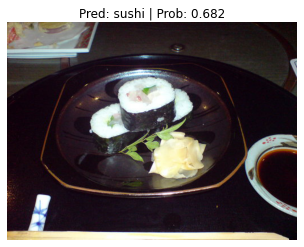

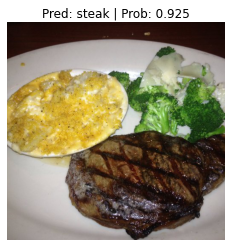

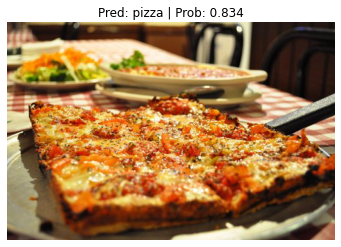

In [43]:
# Import function to make predictions on images and plot them 
# See the function previously created in section: https://www.learnpytorch.io/06_pytorch_transfer_learning/#6-make-predictions-on-images-from-the-test-set
from going_modular.going_modular.predictions import pred_and_plot_image

# Get a random list of 3 images from 20% test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(data_20_percent_path / "test").glob("*/*.jpg")) # get all test image paths from 20% dataset
test_image_path_sample = random.sample(population=test_image_path_list,
                                       k=num_images_to_plot) # randomly select k number of images

# Iterate through random test image paths, make predictions on them and plot them
for image_path in test_image_path_sample:
    pred_and_plot_image(model=best_model,
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(224, 224))

好的！

将上面的单元格运行几次，我们可以看到我们的模型表现得非常好，并且通常比我们之前构建的模型具有更高的预测概率。

这表明该模型对其所做的决策更有信心。

### 9.1 Predict on a custom image with the best model

Making predictions on the test dataset is cool but the real magic of machine learning is making predictions on custom images of your own.

So let's import the trusty [pizza dad image](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg) (a photo of my dad in front of a pizza) we've been using for the past couple of sections and see how our model performs on it.

data\04-pizza-dad.jpeg already exists, skipping download.


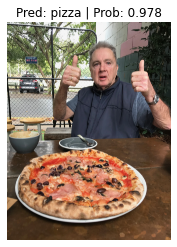

In [44]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = Path("data/04-pizza-dad.jpeg")

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

# Predict on custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names)

哇！

又是两个大拇指！

我们最好的模型正确地预测了“披萨”，这一次的预测概率（0.978）比我们在 [06. PyTorch 迁移学习第 6.1 节]（https://www.learnpytorch.io/06_pytorch_transfer_learning/#61-making-predictions-on-a-custom-image）。

这再次表明我们当前的最佳模型（在 20% 的比萨、牛排、寿司训练数据和 10 个 epoch 上训练的 EffNetB2 特征提取器）已经学习了模式，使其对预测比萨的决定更有信心。

我想知道什么可以进一步提高我们模型的性能？

我将把它作为一个挑战留给你调查。

## Main takeaways

我们现在已经对 [01. PyTorch Workflow Fundamentals](https://www.learnpytorch.io/01_pytorch_workflow/)，我们已经准备好数据，我们已经构建并选择了一个预训练模型，我们已经使用我们的各种辅助函数来训练和评估模型 在这个笔记本中，我们通过运行和跟踪一系列实验改进了我们的 FoodVision Mini 模型。
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

你应该为自己感到骄傲，这是不小的壮举！

您应该从这个里程碑项目 1 中获得的主要想法是：

* 机器学习从业者的座右铭：*实验、实验、实验！*（尽管我们已经做了很多这样的工作）。
* 在开始时，请保持小规模的实验，以便您可以快速工作，前几次实验的运行时间不应超过几秒到几分钟。
*你做的实验越多，你就能越快找出*不起作用*的东西。
* 当你找到有用的东西时扩大规模。例如，由于我们发现了一个使用 EffNetB2 作为特征提取器的性能非常好的模型，也许您现在想看看当您将其扩展到整个 [Food101 数据集](https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html)(来自`torchvision.datasets`)时会发生什么。
* 以编程方式跟踪您的实验需要几个步骤来设置，但从长远来看这是值得的，这样您就可以弄清楚哪些有效，哪些无效。
    * 那里有许多不同的机器学习实验跟踪器，因此请探索一些并尝试一下。

## Exercises

> **Note:** These exercises expect the use of `torchvision` v0.13+ (released July 2022), previous versions may work but will likely have errors.

All of the exercises are focused on practicing the code above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

**Resources:**
* [Exercise template notebook for 07](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/07_pytorch_experiment_tracking_exercise_template.ipynb)
* [Example solutions notebook for 07](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/07_pytorch_experiment_tracking_exercise_solutions.ipynb) (try the exercises *before* looking at this)
    * See a live [video walkthrough of the solutions on YouTube](https://youtu.be/cO_r2FYcAjU) (errors and all)


1. Pick a larger model from [`torchvision.models`](https://pytorch.org/vision/main/models.html) to add to the list of experiments (for example, EffNetB3 or higher). 
    * How does it perform compared to our existing models?
2. Introduce data augmentation to the list of experiments using the 20% pizza, steak, sushi training and test datasets, does this change anything?
    * For example, you could have one training DataLoader that uses data augmentation (e.g. `train_dataloader_20_percent_aug` and `train_dataloader_20_percent_no_aug`) and then compare the results of two of the same model types training on these two DataLoaders.
    * **Note:** You may need to alter the `create_dataloaders()` function to be able to take a transform for the training data and the testing data (because you don't need to perform data augmentation on the test data). See [04. PyTorch Custom Datasets section 6](https://www.learnpytorch.io/04_pytorch_custom_datasets/#6-other-forms-of-transforms-data-augmentation) for examples of using data augmentation or the script below for an example:

```python
# Note: Data augmentation transform like this should only be performed on training data
train_transform_data_aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor(),
    normalize
])

# Helper function to view images in a DataLoader (works with data augmentation transforms or not) 
def view_dataloader_images(dataloader, n=10):
    if n > 10:
        print(f"Having n higher than 10 will create messy plots, lowering to 10.")
        n = 10
    imgs, labels = next(iter(dataloader))
    plt.figure(figsize=(16, 8))
    for i in range(n):
        # Min max scale the image for display purposes
        targ_image = imgs[i]
        sample_min, sample_max = targ_image.min(), targ_image.max()
        sample_scaled = (targ_image - sample_min)/(sample_max - sample_min)

        # Plot images with appropriate axes information
        plt.subplot(1, 10, i+1)
        plt.imshow(sample_scaled.permute(1, 2, 0)) # resize for Matplotlib requirements
        plt.title(class_names[labels[i]])
        plt.axis(False)

# Have to update `create_dataloaders()` to handle different augmentations
import os
from torch.utils.data import DataLoader
from torchvision import datasets

NUM_WORKERS = os.cpu_count() # use maximum number of CPUs for workers to load data 

# Note: this is an update version of data_setup.create_dataloaders to handle
# differnt train and test transforms.
def create_dataloaders(
    train_dir, 
    test_dir, 
    train_transform, # add parameter for train transform (transforms on train dataset)
    test_transform,  # add parameter for test transform (transforms on test dataset)
    batch_size=32, num_workers=NUM_WORKERS
):
    # Use ImageFolder to create dataset(s)
    train_data = datasets.ImageFolder(train_dir, transform=train_transform)
    test_data = datasets.ImageFolder(test_dir, transform=test_transform)

    # Get class names
    class_names = train_data.classes

    # Turn images into data loaders
    train_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )
    test_dataloader = DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )

    return train_dataloader, test_dataloader, class_names
```

3. Scale up the dataset to turn FoodVision Mini into FoodVision Big using the entire [Food101 dataset from `torchvision.models`](https://pytorch.org/vision/stable/generated/torchvision.datasets.Food101.html#torchvision.datasets.Food101)
    * You could take the best performing model from your various experiments or even the EffNetB2 feature extractor we created in this notebook and see how it goes fitting for 5 epochs on all of Food101.
    * If you try more than one model, it would be good to have the model's results tracked.
    * If you load the Food101 dataset from `torchvision.models`, you'll have to create PyTorch DataLoaders to use it in training.
    * **Note:** Due to the larger amount of data in Food101 compared to our pizza, steak, sushi dataset, this model will take longer to train.

## Extra-curriculum

* Read [The Bitter Lesson](http://www.incompleteideas.net/IncIdeas/BitterLesson.html) blog post by Richard Sutton to get an idea of how many of the latest advancements in AI have come from increased scale (bigger datasets and bigger models) and more general (less meticulously crafted) methods.
* Go through the [PyTorch YouTube/code tutorial](https://pytorch.org/tutorials/beginner/introyt/tensorboardyt_tutorial.html) for TensorBoard for 20-minutes and see how it compares to the code we've written in this notebook.
* Perhaps you may want to view and rearrange your model's TensorBoard logs with a DataFrame (so you can sort the results by lowest loss or highest accuracy), there's a guide for this [in the TensorBoard documentation](https://www.tensorflow.org/tensorboard/dataframe_api). 
* If you like to use VSCode for development using scripts or notebooks (VSCode can now use Jupyter Notebooks natively), you can setup TensorBoard right within VSCode using the  [PyTorch Development in VSCode guide](https://code.visualstudio.com/docs/datascience/pytorch-support).
* To go further with experiment tracking and see how your PyTorch model is performing from a speed perspective (are there any bottlenecks that could be improved to speed up training?), see the [PyTorch documentation for the PyTorch profiler](https://pytorch.org/blog/introducing-pytorch-profiler-the-new-and-improved-performance-tool/).
* Made With ML is an outstanding resource for all things machine learning by Goku Mohandas and their [guide on experiment tracking](https://madewithml.com/courses/mlops/experiment-tracking/) contains a fantastic introduction to tracking machine learning experiments with MLflow.